**Proyek Mini: Analisis Data Perceraian 🚀**

**Tujuan: Menerapkan konsep yang telah dipelajari(relationship in Python) untuk menemukan wawasan baru dari dataset perceraian.**

---

**Load Dataset**


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

divorce_df = pd.read_csv('divorce.csv')

divorce_df[["marriage_date", "dob_man", "dob_woman"]] = divorce_df[["marriage_date", "dob_man", "dob_woman"]].apply(pd.to_datetime)

divorce_df.head()

,marriage_date,marriage_duration,income_man,income_woman,num_kids,education_man,education_woman,dob_man,dob_woman
0,1998-06-15,15.5,65000,45000,2,Professional,Professional,1970-02-20,1972-08-10
1,2010-08-22,5.2,48000,52000,1,Preparatory,Professional,1985-11-05,1986-04-15
2,1995-04-11,20.1,85000,0,3,Professional,Secondary,1968-07-18,1970-01-25
3,2005-11-30,10.0,55000,60000,2,Secondary,Preparatory,1980-03-12,1982-09-08
4,2018-02-14,2.5,42000,41000,0,Preparatory,Preparatory,1992-10-01,1993-05-20


In [8]:
divorce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   marriage_date      30 non-null     datetime64[ns]
 1   marriage_duration  30 non-null     float64       
 2   income_man         30 non-null     int64         
 3   income_woman       30 non-null     int64         
 4   num_kids           30 non-null     int64         
 5   education_man      30 non-null     object        
 6   education_woman    30 non-null     object        
 7   dob_man            30 non-null     datetime64[ns]
 8   dob_woman          30 non-null     datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(2)
memory usage: 2.2+ KB


---

**Tugas:**

**1. Analisis Hubungan Usia dan Pendapatan:**

- Buat dua kolom baru: 
    - man_age_marriage dan woman_age_marriage yang menghitung usia masing-masing pasangan saat menikah.
- Gunakan sns.scatterplot() untuk mengeksplorasi hubungan antara usia menikah (woman_age_marriage) dan pendapatan (income_woman). Apakah ada tren yang terlihat?
- Lakukan hal yang sama untuk pria (man_age_marriage dan income_man)

In [15]:
# membuat 2 kolom baru untuk menghitung usia pernikahan saat menikah

divorce_df['man_age_marriage'] = ((divorce_df['marriage_date'] - divorce_df['dob_man']).dt.days / 365.25).round(1)
divorce_df['woman_age_marriage'] = ((divorce_df['marriage_date'] - divorce_df['dob_woman']).dt.days / 365.25).round(1)

In [16]:
divorce_df.head()

,marriage_date,marriage_duration,income_man,income_woman,num_kids,education_man,education_woman,dob_man,dob_woman,man_age_marriage,woman_age_marriage
0,1998-06-15,15.5,65000,45000,2,Professional,Professional,1970-02-20,1972-08-10,28.3,25.8
1,2010-08-22,5.2,48000,52000,1,Preparatory,Professional,1985-11-05,1986-04-15,24.8,24.4
2,1995-04-11,20.1,85000,0,3,Professional,Secondary,1968-07-18,1970-01-25,26.7,25.2
3,2005-11-30,10.0,55000,60000,2,Secondary,Preparatory,1980-03-12,1982-09-08,25.7,23.2
4,2018-02-14,2.5,42000,41000,0,Preparatory,Preparatory,1992-10-01,1993-05-20,25.4,24.7


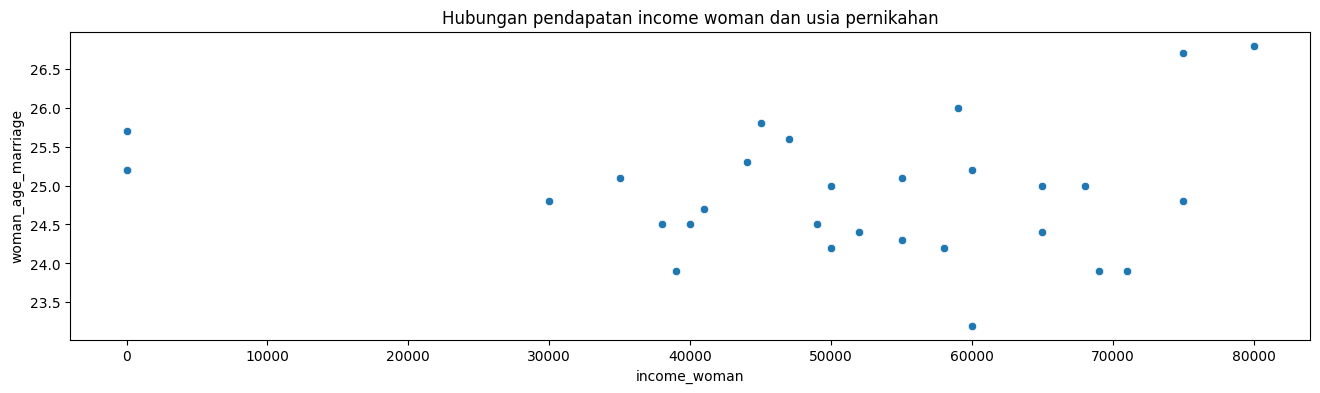

Koefisien korelasi antara x dan y adalah: -0.03162162015090917


In [27]:
# Hubungan pendapatan income woman dan usia pernikahan
plt.figure(figsize=(16, 4))
sns.scatterplot(x='income_woman', 
                y='woman_age_marriage', 
                data=divorce_df)
plt.title('Hubungan pendapatan income woman dan usia pernikahan')
plt.show()


corr = divorce_df['income_woman'].corr(divorce_df['woman_age_marriage'])
print(f"Koefisien korelasi antara x dan y adalah: {corr}")

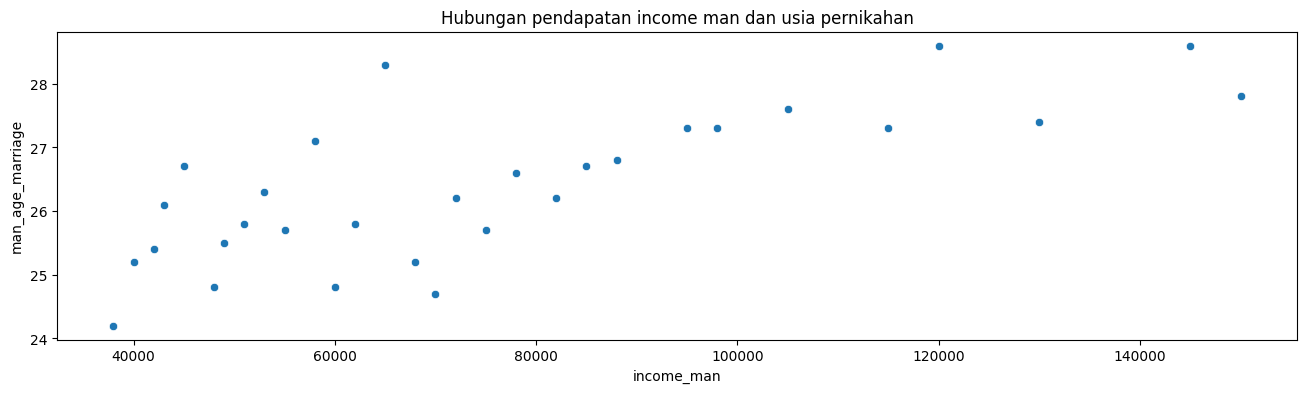

Koefisien korelasi antara x dan y adalah: 0.7475805332985773


In [28]:
# Hubungan pendapatan income woman dan usia pernikahan
plt.figure(figsize=(16, 4))
sns.scatterplot(x='income_man', 
                y='man_age_marriage', 
                data=divorce_df)
plt.title('Hubungan pendapatan income man dan usia pernikahan')
plt.show()


corr = divorce_df['income_man'].corr(divorce_df['man_age_marriage'])
print(f"Koefisien korelasi antara x dan y adalah: {corr}")

**Kesimpulan**
- Pria dengan pendapatan lebih tinggi cenderung memiliki usia pernikahan yang lebih mana dibanding wanita yang memiliki pendapatan tinggi tetap memiliki usia pernikahan yang rendah

---

**2. Pendidikan dan Durasi Pernikahan:**

- Visualisasikan distribusi marriage_duration untuk setiap tingkat pendidikan wanita (education_woman) menggunakan sns.kdeplot(). Gunakan parameter hue dan cut=0.
- Berdasarkan plot KDE, tingkat pendidikan wanita mana yang cenderung memiliki puncak (peak) durasi pernikahan paling singkat? Tingkat pendidikan mana yang distribusinya paling merata?

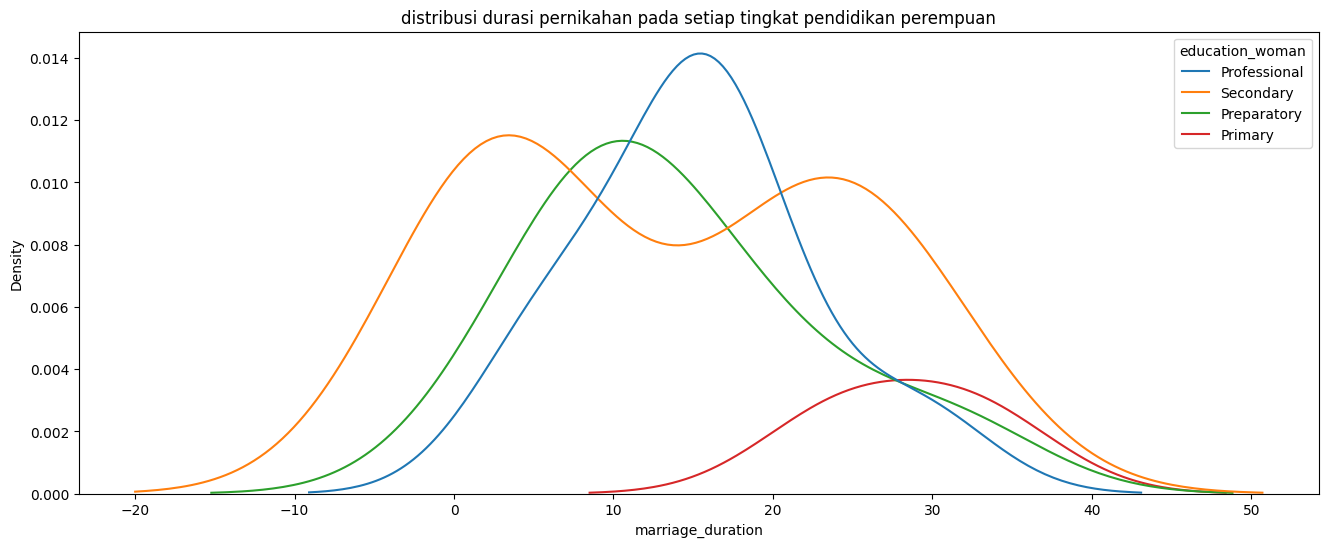

In [37]:
#distribusi durasi pernikahan pada setiap tingkat pendidikan
plt.figure(figsize=(16, 6))
sns.kdeplot(data=divorce_df, 
            x="marriage_duration", 
            hue="education_woman",) 
plt.title('distribusi durasi pernikahan pada setiap tingkat pendidikan perempuan')
plt.show() 

**Kesimpulan**

- Wanita dengan pendidikan Professional cenderung memiliki durasi pernikahan paling singkat sebelum bercerai.
- Wanita dengan pendidikan Secondary cenderung memiliki durasi pernikahan paling lama.
- Wanita dengan pendidikan Primary memiliki sebaran waktu perceraian yang paling merata.


---

**Korelasi yang Lebih Dalam:**
- Hitung matriks korelasi hanya untuk variabel income_man, income_woman, num_kids, dan marriage_duration.
- Visualisasikan matriks korelasi ini menggunakan sns.heatmap() dengan anotasi. Pasangan variabel mana yang memiliki korelasi positif terkuat?

In [33]:
corr_matrix = divorce_df[['income_man', 'income_woman', 'num_kids', 'marriage_duration']].corr()
corr_matrix


,income_man,income_woman,num_kids,marriage_duration
income_man,1.000000,-0.119296,0.916395,0.966137
income_woman,-0.119296,1.000000,-0.032387,-0.098052
num_kids,0.916395,-0.032387,1.000000,0.962893
marriage_duration,0.966137,-0.098052,0.962893,1.000000


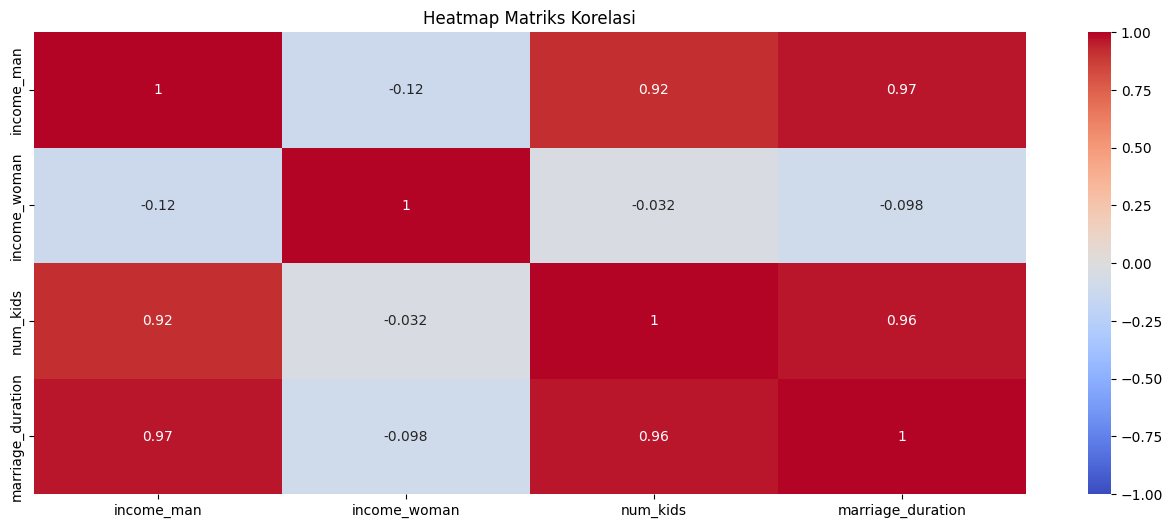

In [35]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Matriks Korelasi')
plt.show()

**Kesimpulan**
- korelasi terkuat ada pada ketikan income man tinggi maka duration pernikahan jauh lebih lama dan jumlah anak pun lebih banyak

---